In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv("Zoo.csv")
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
data.shape

(101, 18)

In [4]:
X = data.iloc[:, 1:17]
Y = data.iloc[:, 17]

In [5]:
kfold = KFold(n_splits=10)

In [6]:
#build model for 3 nearest neighbours
model_3 = KNeighborsClassifier(n_neighbors=3)

In [7]:
#Cross val score of model 
results = cross_val_score(model_3, X, Y, cv=kfold)
print(results.mean())

0.9400000000000001


In [8]:
model_3.fit(X,Y)
preds = model_3.predict(X)
preds

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 4, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 5, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [9]:
pd.Series(preds).value_counts() # getting the count of each category  

1    41
2    20
4    14
7    10
6     8
5     5
3     3
dtype: int64

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y,preds)

array([[41,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  1,  1,  0,  0],
       [ 0,  0,  0, 13,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0, 10]], dtype=int64)

In [11]:
# classification_report
from sklearn.metrics import classification_report
print(classification_report(Y,preds))

0.9801980198019802

In [13]:
# running KNN algorithm for 1 to 40 nearest neighbours
k_range = range(1, 40)
# creating empty list variable to store validation score
k_scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X, Y, cv=kfold)
    k_scores.append(scores.mean())


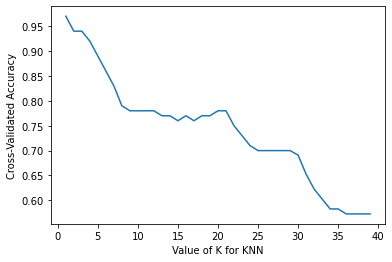

In [14]:
# Cross-Validated Accuracy plot
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [16]:
# creating empty list variable for storing the accuracy values 
accuracy = []

# running KNN algorithm for 1 to 40 nearest neighbours 
k_range = range(1, 40)

 
for i in k_range:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X,Y)
    predss = model.predict(X)
    acc = np.mean(predss==Y)
    accuracy.append([acc])

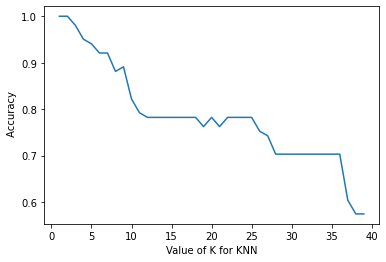

In [17]:
# Accuracy plot
plt.plot(k_range, accuracy)
plt.xlabel('Value of K for KNN')
plt.ylabel(' Accuracy')
plt.show()